
# Lab-7:
In this lab, we will examine some classifiers and the regularization concept in the classification problem.
Also, we will see

### Objectives:
1. Lasso and Ridge
2. Regularization in Keras.
2. PCA

---
<span style="color:red">
   L1, L2 regularization they act as a constraint region for the coefficients, where their values should reside in it.
   It works by Adding to the cost function  a term of summation of all absolute values/squared values of the weights.

   L2 constraint is spherical shape which is more felixible than the L1 constraint area
   which is like rhombus

   L1 may force some coeffeicient to be zero when lambda is large enough, so l1 regularization could be treated as kind of variable selection and it can produce sparse model.

</span>

## Lasso and Ridge
Both models are the regularized forms of the linear regression.
Lasso with L1 regularization and Ridge with L2 regularization.
Both act as a constraint region for the coeffeicients/weight, where they must reside in.

### Issues:
1. When to use Lasso?
<span style="color:blue">

    1. Used when there are only a few predictors actually impact the response.
    2. It can be used as a feature selection algorithm, with the appropriate value of lambda, a sparse model can be produced.
2. When to use Ridge?
<span style="color:blue">
Used when there are many of predictors and most of them influence the response.

3. Since it is hard to decide the parameters influence, How we can decide which regularization? and decide the value of lambda?
<span style="color:blue">
Using the cross validation!
    

### Loading Boston dataset
Housing-Prices Values in Suburbs of Boston.

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

X, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)
print(x_train.shape)

(353, 13)


### Fitting both Lasso and Ridge
Task:

Fit two models: Lasso and Ridge - with the default alpha-.
Then print their coefficients and notice the difference.

In [3]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
ridge = Ridge()

lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

print("Lasso Coefficient:",lasso.coef_)
print("Ridge Coefficient",ridge.coef_)

# the result of the coefficients show that some of the features of 
# lasso regression went to zero.


Lasso Coefficient: [-6.29657633e-02  3.50956640e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.26979134e+00  6.77955847e-04 -6.45065773e-01
  1.93545727e-01 -1.35087027e-02 -6.45345873e-01  4.49042185e-03
 -6.73150676e-01]
Ridge Coefficient [-1.11057981e-01  3.65852805e-02  4.69212854e-02  6.03824135e-01
 -6.97460565e+00  5.11864285e+00 -2.69870227e-02 -1.22824280e+00
  2.49139807e-01 -1.39899765e-02 -8.47813312e-01  6.95422088e-03
 -4.68816487e-01]


Task: Let's try different values for alpha for Lasso regressor and plot the validation loss.

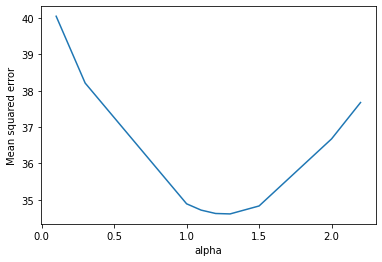

Best value of alpha: 1.3


In [6]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    # Write (5 lines): create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean sqaured error loss, then append it to the losses array
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(x_train, y_train)
    lasso_pred = lasso_model.predict(x_val)
    mse = mean_squared_error(y_val, lasso_pred)
    losses.append(mse)
    
plt.plot(alphas, losses)
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)


# The plot shows that previously the model was overfitting due to small alpha value
# and at some point, an higher alpha value makes the model to underfit the data

Measuring the loss on the testset with Lasso regressor with the best alpha.

In [7]:
lasso = Lasso(best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("MSE on testset:", mean_squared_error(y_test, y_pred))

MSE on testset: 31.953762880829828


### How to Do it in Keras.

Task: add regularization in the dense layers in the following model, with 

In [8]:
#%%

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
from math import sqrt, ceil

(x_train, y_train), (x_test, y_test) = mnist.load_data() 
train_shape = x_train.shape
test_shape = x_test.shape
print(x_train.shape, x_test.shape)
#Images are 2D. What's the difference in 3D images?
x_train = x_train.reshape(train_shape[0], train_shape[1] * train_shape[2])
x_test = x_test.reshape(test_shape[0], test_shape[1] * test_shape[2])
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)



# Some hyperparamters:


epochs = 5
batch_size = 10
input_size = x_train.shape[1]
num_classes = 10 

# Define your regularizer here (1 line).

l1_reg = regularizers.L1(1e-6)
l2_reg = regularizers.L2(1e-5)
l1_l2_reg = regularizers.L1L2(l1=1e-4,l2=1e-5)

def get_model():
    model = Sequential()

    model.add(Dense(units=128,
                    input_dim=input_size,
                    activation='sigmoid',
                   kernel_regularizer=l1_reg))

    # Add 2 hidden layers with number of units: 32, 64 


    model.add(Dense(units=num_classes, use_bias=True, activation='softmax',kernel_regularizer=l2_reg))
    #Try to change the optimizer, visit: https://goo.gl/dHFJNy
    #Try to change the loss func, visit: https://goo.gl/xMrooU
    #Try to change learning rate (lr)
    #In your free time take a look at different variations of GD: https://goo.gl/YFa6XY
    sgd_optimizer = SGD(lr=.01)
    adam_optimizer = Adam(lr=.001)
    model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = get_model()
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

loss, acc= model.evaluate(x_test, y_test)
print("Loss:", loss, ", Accuracy:", acc)


(60000, 28, 28) (10000, 28, 28)
(60000, 784) (60000,) (10000, 784) (10000,)
Epoch 1/5
6000/6000 [==============================] - 6s 952us/step - loss: 0.8769 - accuracy: 0.7640
Epoch 2/5
6000/6000 [==============================] - 5s 870us/step - loss: 0.4325 - accuracy: 0.8822
Epoch 3/5
6000/6000 [==============================] - 6s 944us/step - loss: 0.4017 - accuracy: 0.8867
Epoch 4/5
6000/6000 [==============================] - 6s 925us/step - loss: 0.4137 - accuracy: 0.8844
Epoch 5/5
313/313 [==============================] - 0s 785us/step - loss: 0.3601 - accuracy: 0.8977
Loss: 0.36014288663864136 , Accuracy: 0.8977000117301941


## PCA
1. How does PCA reduce data dimensionality? <span style="color:blue"> It linearly transforms initial data points by projecting them to new axes - the ones that explaim maximum amount of variance. </span>
2. What is eigenvector? <span style="color:blue">  Characteristic vector of a linear transformation - a nonzero vector that changes at most by a scalar factor (eigenvector) when that linear transformation is applied to it. </span>


Task: Now you will implement basic steps of PCA: mean-centering, eigenvectors calculation using covariance matrix, projecting data to the first PC, and restoring it back.

### Generating data ###

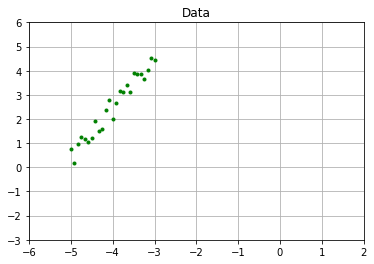

In [9]:
# N is a sample size
N = 25
# we can fix a random seed. It allows us to get the same data
np.random.seed(10)
# form our data
x = np.linspace(-5, -3, N)
y = 10 + 2*x + np.random.random(size=(N,))
data = np.stack([x,y], axis = 1)


plt.title("Data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.axis([-6, 2, -3, 6])
plt.grid('True')

### Center data###

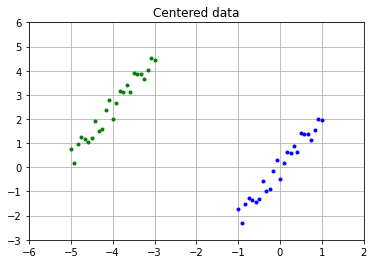

In [11]:
# center data by subtracting mean value from each feature
# pay attention to mean_vector <-- we need it later for restoring our data
mean_vector = data.mean(axis=0)
data_centered = data - mean_vector

plt.title("Centered data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.axis([-6, 2, -3, 6])
plt.grid('True')

### Covariance matrix ###

In [17]:
# calculate covariance matrix for our centered data
cov_mat = np.cov(data_centered, rowvar=False)
print('Covariance matrix:\n', cov_mat)

# Cov(x, y) = (1 / (n - 1)) * Sum_i(x_i * y_i)
# also, to make sure you understand how to calculate covariance, calculate and print cov(X,Y)
# check that it is the same as in the covariance matrix
cov_xy = 1/(N - 1) * np.sum(data_centered[:,0] * data_centered[:,1])
print('cov(X,Y):', cov_xy)

Covariance matrix:
 [[0.37615741 0.76801889]
 [0.76801889 1.65019543]]
cov(X,Y): 0.7680188927863001


### Eigenvectors and eigenvalues

In [20]:
# compute eigenvectors and eigenvalues, print them
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print('eig_values:', eig_values)
print('eig_vectors:\n', eig_vectors)

# are they already in the needed order?
# if not, order eigenvectors and eigenvalues by eigenvalues, descending (3 lines)
# Note: the eig_vectors is a col vectors.

idx = np.argsort(-eig_values)
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]
print('\nsorteed eig_values:', eig_values)
print('sorted eig_vectors:\n', eig_vectors)

# estimate variance retained by each principal component
retained_var = eig_values / eig_values.sum()
print('\nretained variance:',   retained_var)

eig_values: [0.01535567 2.01099716]
eig_vectors:
 [[-0.90509952 -0.42519979]
 [ 0.42519979 -0.90509952]]

sorteed eig_values: [2.01099716 0.01535567]
sorted eig_vectors:
 [[-0.42519979 -0.90509952]
 [-0.90509952  0.42519979]]

retained variance: [0.99242201 0.00757799]


### Project data ###

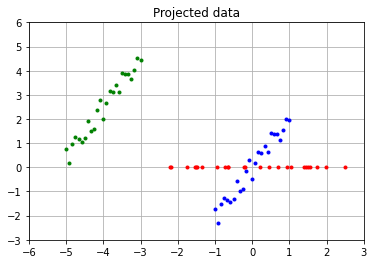

In [21]:
# project data to the first principal component
first_pc = eig_vectors[:,:1]
projected_data = np.matmul(data_centered,first_pc)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(projected_data, np.zeros(len(projected_data)), '.', color="red")
plt.axis([-6, 3, -3, 6])
plt.grid('True')

### Restore data back ###

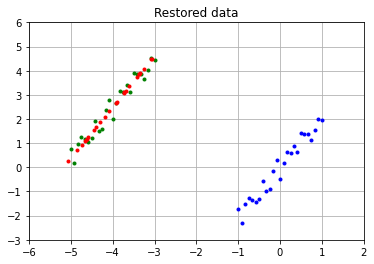

In [22]:
# Projected_data . first_pc.T + means
# project data back to initial space
# remember to add a mean_vector to the restored data
restored_data = np.matmul(projected_data,first_pc.T) + mean_vector

plt.title("Restored data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(restored_data[:,0], restored_data[:,1], '.', color="red")
plt.axis([-6, 2, -3, 6])
plt.grid('True')
plt.show()

### SKLEARN implementation ###

[-4.          2.50055666]
[[-0.42519979 -0.90509952]]
[2.01099716]
[0.99242201]


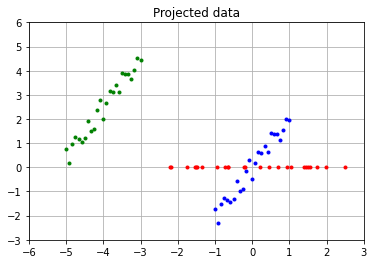

In [23]:
# this is to check your solution
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_PCA = pca.fit_transform(data)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(x_PCA, np.zeros(len(projected_data)), '.', color="red")
plt.axis([-6, 3, -3, 6])
plt.grid('True')

print(pca.mean_)
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)